In [1]:
import pandas as pd
import numpy as np

In [2]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='mmyaaSU4OXT6qsSqcSBB79jjFfLMIzYb3N-sESNkqz-Q',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.eu-gb.cloud-object-storage.appdomain.cloud')

bucket = 'ibmhackchallenge-donotdelete-pr-bztmtpbenuvknq'
object_key = 'Placement_Data_Full_Class.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

placement_data = pd.read_csv(body)
placement_data.head()



,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [3]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [4]:
#checking for null values
print("Data columns with NULL Values:")
placement_data.isnull().sum()

Data columns with NULL Values:


sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [5]:
#dropping unwanted columns
placement_data.drop(['sl_no','ssc_b', 'hsc_b'], axis = 1, inplace = True)
placement_data.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,52.00,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [6]:
#used for Salary Prediction
placement_data_ana = placement_data.copy()

In [7]:
#filling null values in Salary = 0
placement_data['salary'].fillna(value=0, inplace=True)

In [8]:
placement_data["gender"] = placement_data.gender.map({"M":0,"F":1})
placement_data["hsc_s"] = placement_data.hsc_s.map({"Commerce":0,"Science":1,"Arts":2})
placement_data["degree_t"] = placement_data.degree_t.map({"Comm&Mgmt":0,"Sci&Tech":1, "Others":2})
placement_data["workex"] = placement_data.workex.map({"No":0, "Yes":1})
placement_data["status"] = placement_data.status.map({"Not Placed":0, "Placed":1})
placement_data["specialisation"] = placement_data.specialisation.map({"Mkt&HR":0, "Mkt&Fin":1})

# Predicting Placement Status (Binary Classification)

# Logistic Regression

In [9]:
placement_data_reg = placement_data.copy()

In [10]:
# Seperating Features and Target
x = placement_data_reg[['gender', 'ssc_p', 'hsc_p', 'hsc_s', 'degree_p', 'degree_t', 'workex','etest_p', 'specialisation', 'mba_p',]]
y = placement_data_reg['status']

In [11]:
x

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,0,67.00,91.00,0,58.00,1,0,55.0,0,58.80
1,0,79.33,78.33,1,77.48,1,1,86.5,1,66.28
2,0,65.00,68.00,2,64.00,0,0,75.0,1,57.80
3,0,56.00,52.00,1,52.00,1,0,66.0,0,59.43
4,0,85.80,73.60,0,73.30,0,0,96.8,1,55.50
...,...,...,...,...,...,...,...,...,...,...
210,0,80.60,82.00,0,77.60,0,0,91.0,1,74.49
211,0,58.00,60.00,1,72.00,1,0,74.0,1,53.62
212,0,67.00,67.00,0,73.00,0,1,59.0,1,69.72
213,1,74.00,66.00,0,58.00,0,0,70.0,0,60.23


In [12]:
#Train Test Split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 12)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [14]:
logistic_reg = LogisticRegression(max_iter = 1000)
logistic_reg.fit(x_train, y_train)
y_pred_lr = logistic_reg.predict(x_test)

In [15]:
accuracy_score(y_test, y_pred_lr)

0.8769230769230769

In [16]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       1.00      0.64      0.78        22
           1       0.84      1.00      0.91        43

    accuracy                           0.88        65
   macro avg       0.92      0.82      0.85        65
weighted avg       0.90      0.88      0.87        65



# Decision Tree Algorithm

In [17]:
#Lets make a copy of data, before we proceeed with specific problems
placement_data_clf = placement_data.copy()

In [18]:
# Library imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [19]:
dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(x_train, y_train)
y_pred_dt = dtree.predict(x_test)

In [20]:
accuracy_score(y_test, y_pred_dt)

0.8307692307692308

In [21]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.87      0.59      0.70        22
           1       0.82      0.95      0.88        43

    accuracy                           0.83        65
   macro avg       0.84      0.77      0.79        65
weighted avg       0.84      0.83      0.82        65



# Random Forest Algorithm

In [22]:
#Using Random Forest Algorithm
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)
y_pred_rf = random_forest.predict(x_test)

In [23]:
accuracy_score(y_test, y_pred_rf)

0.8923076923076924

In [24]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.94      0.73      0.82        22
           1       0.88      0.98      0.92        43

    accuracy                           0.89        65
   macro avg       0.91      0.85      0.87        65
weighted avg       0.90      0.89      0.89        65



# Predicting Salary(Regression Analysis)

In [25]:
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, r2_score

In [26]:
placement_data_ana["gender"] = placement_data_ana.gender.map({"M":0,"F":1})
placement_data_ana["hsc_s"] = placement_data_ana.hsc_s.map({"Commerce":0,"Science":1,"Arts":2})
placement_data_ana["degree_t"] = placement_data_ana.degree_t.map({"Comm&Mgmt":0,"Sci&Tech":1, "Others":2})
placement_data_ana["workex"] = placement_data_ana.workex.map({"No":0, "Yes":1})
placement_data_ana["specialisation"] = placement_data_ana.specialisation.map({"Mkt&HR":0, "Mkt&Fin":1})

In [27]:
placement_data_ana.dropna(inplace=True) #dropping NaNs (in Salary)
placement_data_ana.drop("status", axis=1, inplace=True) #dropping Status = "Placed" column

In [28]:
placement_data_ana.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
0,0,67.00,91.00,0,58.00,1,0,55.0,0,58.80,270000.0
1,0,79.33,78.33,1,77.48,1,1,86.5,1,66.28,200000.0
2,0,65.00,68.00,2,64.00,0,0,75.0,1,57.80,250000.0
4,0,85.80,73.60,0,73.30,0,0,96.8,1,55.50,425000.0
7,0,82.00,64.00,1,66.00,1,1,67.0,1,62.14,252000.0


In [29]:
#Seperating Depencent and Independent Vaiiables
y = placement_data_ana["salary"] #Dependent Variable
X = placement_data_ana.drop("salary", axis=1)
column_names = X.columns.values

In [30]:
#Scalizing between 0-1 (Normalization)
from sklearn.preprocessing import MinMaxScaler
X_scaled = MinMaxScaler().fit_transform(X)

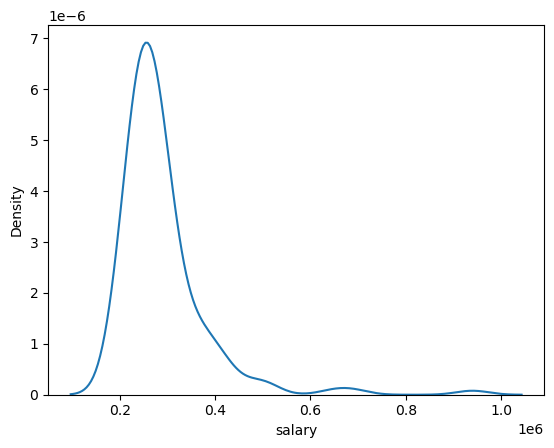

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(y)
plt.show()

In [32]:
#checking number of records having salary greater than 400000
y[y > 400000]
#only 9 values

4      425000.0
39     411000.0
53     450000.0
77     500000.0
95     420000.0
119    940000.0
150    690000.0
163    500000.0
174    500000.0
177    650000.0
Name: salary, dtype: float64

In [33]:
#Removing these Records from data
X_scaled = X_scaled[y < 400000]
y = y[y < 400000]

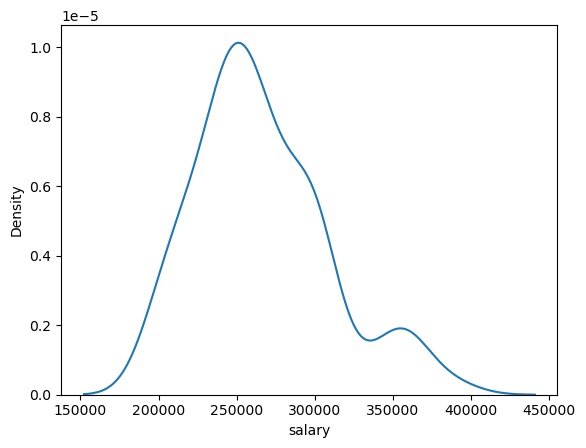

In [34]:
sns.kdeplot(y)
plt.show()
#Skewed Data

# Determining Least Significant Feature

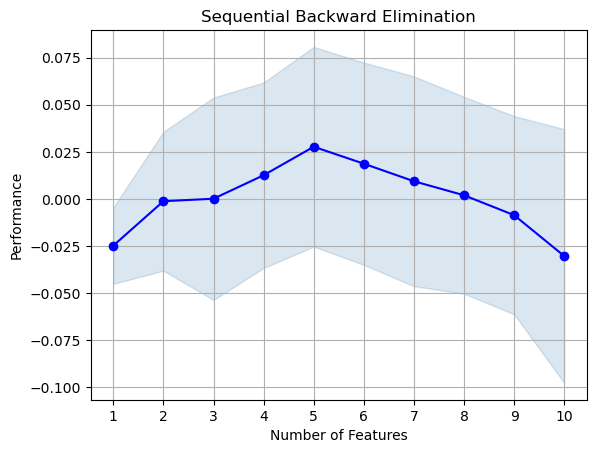

In [35]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
sfs = SFS(linreg, k_features=1, forward=False, scoring='r2',cv=10)
sfs = sfs.fit(X_scaled, y)
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

plt.title('Sequential Backward Elimination')
plt.grid()
plt.show()
#From Plot its clear that, many features actually decrease the performance

In [36]:
# Lets see the top 5 most significant features
top_n = 5
sfs.get_metric_dict()[top_n]

{'feature_idx': (0, 3, 5, 7, 9),
 'cv_scores': array([-0.09997564, -0.11551795,  0.14652782,  0.19241391, -0.19535134,
        -0.13235138, -0.03896556,  0.3116134 ,  0.13836643,  0.07020936]),
 'avg_score': 0.02769690321901701,
 'feature_names': ('0', '3', '5', '7', '9'),
 'ci_bound': 0.11802751969012418,
 'std_dev': 0.15891404557580255,
 'std_err': 0.052971348525267505}

In [37]:
#Top N Features
top_n_indices = list(sfs.get_metric_dict()[top_n]['feature_idx'])
print(f"Most Significant {top_n} Features:")
for col in column_names[top_n_indices]:
    print(col)

Most Significant 5 Features:
gender
hsc_s
degree_t
etest_p
mba_p


In [38]:
placement_data_SalaryReg = placement_data_ana.copy()

In [39]:
x = placement_data_SalaryReg[['gender', 'hsc_s', 'degree_t', 'etest_p', 'mba_p']]
y = placement_data_SalaryReg['salary']

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 12)

In [41]:
logistic_reg = LogisticRegression(max_iter = 10000)
logistic_reg.fit(x_train, y_train)
y_pred = logistic_reg.predict(x_test)

/opt/conda/envs/Python-RT23.1-Premium/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [42]:
accuracy_score(y_test, y_pred)

0.13333333333333333

In [43]:
print(classification_report(y_test, y_pred, zero_division = 0))

              precision    recall  f1-score   support

    200000.0       0.00      0.00      0.00         1
    210000.0       0.00      0.00      0.00         3
    216000.0       0.00      0.00      0.00         1
    218000.0       0.00      0.00      0.00         1
    220000.0       0.00      0.00      0.00         1
    225000.0       0.00      0.00      0.00         1
    230000.0       0.00      0.00      0.00         2
    236000.0       0.00      0.00      0.00         1
    240000.0       0.00      0.00      0.00         3
    250000.0       0.13      1.00      0.23         3
    260000.0       0.00      0.00      0.00         4
    265000.0       0.00      0.00      0.00         4
    270000.0       0.00      0.00      0.00         0
    275000.0       0.00      0.00      0.00         1
    278000.0       0.00      0.00      0.00         1
    280000.0       0.00      0.00      0.00         1
    287000.0       0.00      0.00      0.00         0
    290000.0       0.00    

In [44]:
#saving the model
import pickle

pickle.dump(random_forest,open('PlacementPrediction_rf.pk1','wb'))

In [45]:
pip install -U ibm-watson-machine-learning

Note: you may need to restart the kernel to use updated packages.


In [46]:
from ibm_watson_machine_learning import APIClient
import json
import numpy as np

In [47]:
#Authenticate and Set Space
wml_credentials = {
    "apikey":"yjE1EqzMhv1bFKv4PlKZdClTCnLaFgx8e-Vu2mYUyzri",
    "url":"https://eu-gb.ml.cloud.ibm.com"
}

In [48]:
wml_client = APIClient(wml_credentials)

In [49]:
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  -----------------  ------------------------
ID                                    NAME               CREATED
2c2595d3-6c03-4e9a-8725-c93800d9cb3f  IBM_HC_deployment  2023-08-31T15:15:48.151Z
------------------------------------  -----------------  ------------------------


,ID,NAME,CREATED
0,2c2595d3-6c03-4e9a-8725-c93800d9cb3f,IBM_HC_deployment,2023-08-31T15:15:48.151Z


In [50]:
SPACE_ID = "2c2595d3-6c03-4e9a-8725-c93800d9cb3f"

In [51]:
wml_client.set.default_space(SPACE_ID)

'SUCCESS'

In [52]:
MODEL_NAME = "demoModelDep"
DEPLOYMENT_NAME = "demoModelDep"
BEST_MODEL = random_forest

In [53]:
#Set Python Version
software_spec_uid = wml_client.software_specifications.get_id_by_name('nlp-runtime-23.1-py3.10')

In [54]:
#Setup Model Data
model_props = {
    wml_client.repository.ModelMetaNames.NAME: MODEL_NAME,
    wml_client.repository.ModelMetaNames.TYPE: 'scikit-learn_1.1',
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid
}

In [55]:
#Save Model
model_details = wml_client.repository.store_model(model = BEST_MODEL, meta_props=model_props, training_data=x_train, training_target=y_train)

Traceback (most recent call last):
  File "/opt/conda/envs/Python-RT23.1-Premium/lib/python3.10/site-packages/ibm_watson_machine_learning/libs/repo/mlrepositoryclient/model_collection.py", line 245, in _save_scikit_pipeline_model
    model_artifact = self._create_pipeline_model(artifact, query_param)
  File "/opt/conda/envs/Python-RT23.1-Premium/lib/python3.10/site-packages/ibm_watson_machine_learning/libs/repo/mlrepositoryclient/model_collection.py", line 505, in _create_pipeline_model
    model_artifact = self._create_pipeline_model_v4_cloud(model_artifact, query_param)
  File "/opt/conda/envs/Python-RT23.1-Premium/lib/python3.10/site-packages/ibm_watson_machine_learning/libs/repo/mlrepositoryclient/model_collection.py", line 1018, in _create_pipeline_model_v4_cloud
    model_output = self.repository_api.ml_assets_model_creation_v4_cloud(model_input, query_param,headers)
  File "/opt/conda/envs/Python-RT23.1-Premium/lib/python3.10/site-packages/ibm_watson_machine_learning/libs/repo/s

Publishing model failed.
Reason: (500)
Reason: Internal Server Error
HTTP response headers: HTTPHeaderDict({'Date': 'Thu, 31 Aug 2023 15:47:54 GMT', 'Content-Type': 'application/json', 'Content-Length': '455', 'Connection': 'keep-alive', 'server-timing': 'intid;desc=1934040b5f940609, intid;desc=1934040b5f940609', 'Strict-Transport-Security': 'max-age=31536000; includeSubDomains', 'CF-Cache-Status': 'DYNAMIC', 'Server': 'cloudflare', 'CF-RAY': '7ff66a24c9f423d4-LHR'})
HTTP response body: {
  "trace": "bce8c9db2c763291fdb1b4d6d3d11598",
  "errors": [{
    "code": "unknown_error",
    "message": "An unknown error occurred (Illegal URI reference: Invalid input ' ', expected '/', 'EOI', '#', '?' or pchar (line 1, column 32): /v2/software_specifications/Not Found?space_id=2c2595d3-6c03-4e9a-8725-c93800d9cb3f\n                               ^)",
    "more_info": "https://cloud.ibm.com/apidocs/machine-learning"
  }],
  "status_code": "500"
}



WMLClientError: Publishing model failed.
Reason: (500)
Reason: Internal Server Error
HTTP response headers: HTTPHeaderDict({'Date': 'Thu, 31 Aug 2023 15:47:54 GMT', 'Content-Type': 'application/json', 'Content-Length': '455', 'Connection': 'keep-alive', 'server-timing': 'intid;desc=1934040b5f940609, intid;desc=1934040b5f940609', 'Strict-Transport-Security': 'max-age=31536000; includeSubDomains', 'CF-Cache-Status': 'DYNAMIC', 'Server': 'cloudflare', 'CF-RAY': '7ff66a24c9f423d4-LHR'})
HTTP response body: {
  "trace": "bce8c9db2c763291fdb1b4d6d3d11598",
  "errors": [{
    "code": "unknown_error",
    "message": "An unknown error occurred (Illegal URI reference: Invalid input ' ', expected '/', 'EOI', '#', '?' or pchar (line 1, column 32): /v2/software_specifications/Not Found?space_id=2c2595d3-6c03-4e9a-8725-c93800d9cb3f\n                               ^)",
    "more_info": "https://cloud.ibm.com/apidocs/machine-learning"
  }],
  "status_code": "500"
}


In [ ]:
model_uid = wml_client.repository.get_model_id(model_details)
model_uid

In [ ]:
#Set meta
deployment_props = 
{
    wml_client.deployments.ConfigurationMetaNames.NAME:DEPLOYMENT_NAME,
    wml_client.deployments.ConfigurationMetaNames.ONLINE: {}
}

In [ ]:
#Deploy
deployment1 = {
        artifact_uid=model_uid,
    meta_props = depployment_props
}